In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

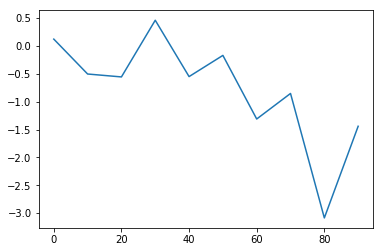

In [2]:
%matplotlib inline
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
s.plot()

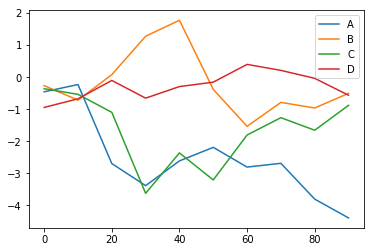

In [3]:
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0), columns=['A', 'B', 'C', 'D'], index=np.arange(0, 100, 10))
df.plot()

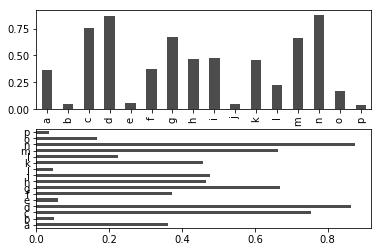

In [8]:
fig, axes = plt.subplots(2, 1)
data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))
data.plot(kind='bar', ax=axes[0], color='k', alpha=0.7)
data.plot(kind='barh', ax=axes[1], color='k', alpha=0.7)

In [9]:
df = pd.DataFrame(np.random.rand(6, 4), index=['one', 'two', 'three', 'four', 'five', 'six'], columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
df

Genus,A,B,C,D
one,0.276939,0.400615,0.511283,0.823655
two,0.686878,0.400733,0.892826,0.431968
three,0.100274,0.899211,0.326684,0.358380
four,0.092333,0.528427,0.627287,0.447416
five,0.242005,0.298398,0.239565,0.087409
six,0.421198,0.765841,0.437296,0.199641


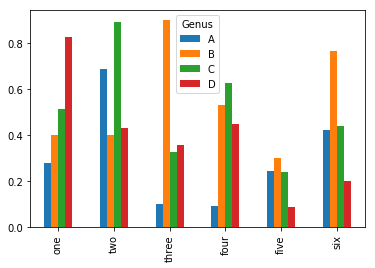

In [10]:
df.plot(kind='bar')

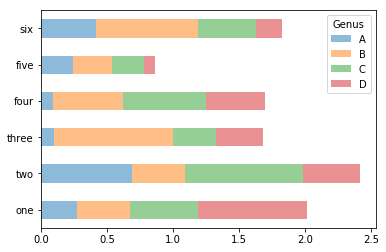

In [11]:
df.plot(kind='barh', stacked=True, alpha=0.5)

In [35]:
tips = pd.read_csv('tips.csv')
# tips.sizeにするとsizeカラムのSeriesオブジェクトを返すのではなくsizeメソッドが呼ばれるので、キーワードで呼んでいる
party_counts = pd.crosstab(tips.day, tips['size'])
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [36]:
party_counts = party_counts.iloc[:, 1:5]
party_pcts = party_counts.div(party_counts.sum(1).astype(float), axis=0)
party_pcts

size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


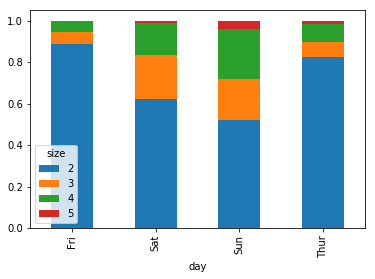

In [37]:
party_pcts.plot(kind='bar', stacked=True)

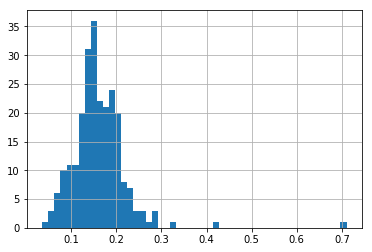

In [38]:
tips['tip_pct'] = tips['tip'] / tips['total_bill']
tips['tip_pct'].hist(bins=50)

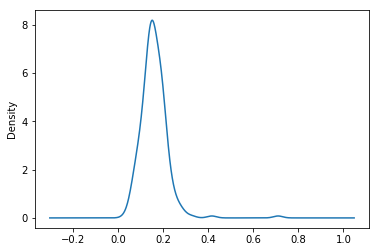

In [39]:
tips['tip_pct'].plot(kind='kde')

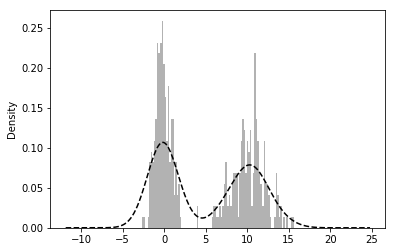

In [40]:
comp1 = np.random.normal(0, 1, size=200) # N(0, 1)の標準正規分布
comp2 = np.random.normal(10, 2, size=200) # N(10, 2)の標準正規分布
values = pd.Series(np.concatenate([comp1, comp2]))
values.hist(bins=100, alpha=0.3, color='k', normed=True)
values.plot(kind='kde', style='k--')

In [41]:
macro = pd.read_csv('macrodata.csv')
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]
trans_data = np.log(data).diff().dropna()
trans_data[-5:]

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


Text(0.5,1,'Changes in log m1 vs. log unemp')

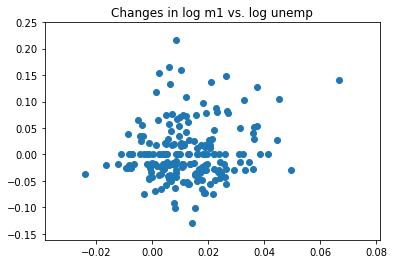

In [43]:
plt.scatter(trans_data['m1'], trans_data['unemp'])
plt.title('Changes in log %s vs. log %s' % ('m1', 'unemp'))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff3438c2518>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7ff341c240b8>]], dtype=object)

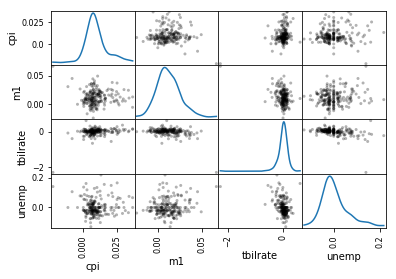

In [47]:
pd.plotting.scatter_matrix(trans_data, diagonal='kde', color='k', alpha=0.3)